# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Входные данные:
• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
• balcony — число балконов<br>
• ceiling_height — высота потолков (м)<br>
• cityCenters_nearest — расстояние до центра города (м)<br>
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
• first_day_exposition — дата публикации<br>
• floor — этаж<br>
• floors_total — всего этажей в доме<br>
• is_apartment — апартаменты (булев тип)<br>
• kitchen_area — площадь кухни в квадратных метрах (м²)<br>
• last_price — цена на момент снятия с публикации<br>
• living_area — жилая площадь в квадратных метрах(м²)<br>
• locality_name — название населённого пункта<br>
• open_plan — свободная планировка (булев тип)<br>
• parks_around3000 — число парков в радиусе 3 км<br>
• parks_nearest — расстояние до ближайшего парка (м)<br>
• ponds_around3000 — число водоёмов в радиусе 3 км<br>
• ponds_nearest — расстояние до ближайшего водоёма (м)<br>
• rooms — число комнат<br>
• studio — квартира-студия (булев тип)<br>
• total_area — площадь квартиры в квадратных метрах (м²)<br>
• total_images — число фотографий квартиры в объявлении<br>

## Оглавление

### [1. Изучение файла с данными. Загрузка библиотек. Общий анализ информации.](#step1)

[Предварительные выводы по разделу](#step2)

### [2. Предобработка данных](#step3)

* [Столбец "locality_name"](#step4)

* [Столбец "is_apartment"](#step5)

* [Столбец "balcony"](#step6)

* [Столбец "ceiling_height"](#step7)

* [Столбец "first_day_exposition"](#step8)

* [Столбцы "living_area" и "kitchen_area"](#step9)

[Выводы по разделу](#step10)

### [3. Добавление в таблицу необходимых столбцов](#step11)

[Выводы по разделу](#step12)

### [4. Исследовательский анализ данных. Визуализация полученных данных](#step13)

### [5. Выполнение поставенных заданий. Избавление от выбросов. Сверка](#step14)

[Выводы по разделу](#step15)

### [6. Анализ параметров, влияющих на стоимость квартиры](#step16)

#### [6.1 Зависимость от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Выводы](#step17)

#### [6.2 Зависимость от даты размещения: дня недели, месяца и года. Выводы](#step18)

#### [6.3 Исследование 10 населённых пунктов с наибольшим числом объявлений. Выводы](#step19)

#### [6.4 Зависимость от удалённости от центра. Выводы](#step20)

#### [6.5 Анализ сегмента и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выводы](#step21)

### [7. Общий вывод по проделанной работе](#step22)

## Изучение файла с данными. Загрузка библиотек. Общий анализ информации. Предварительные выводы <a name="step1"></a>

#### В данном разделе мы познакомимся с данными нашей таблицы. Выведем на экран необходимые для первоначального анализа основные выборки, загрузим библиотеки, которые будут помогать нам на протяжении анализа. Обратим внимание на аномалии в данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

from pymystem3 import Mystem
from collections import Counter

Для начала анализа внимательно изучим таблицу. Для этого выведем на экран первые и последние 5 строк, а также основные параметры и выборку из 5ти случайных строк:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20977,9,29849500.0,175.0,2018-12-17T00:00:00,3,NaN,9.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13976,14,6200000.0,66.0,2017-03-04T00:00:00,2,NaN,5.0,38.5,1,NaN,...,14.0,0.0,Санкт-Петербург,13675.0,8678.0,0.0,NaN,0.0,NaN,180.0
5864,6,3950000.0,51.2,2016-04-25T00:00:00,2,NaN,24.0,28.5,7,False,...,10.8,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,157.0
19482,3,5500000.0,60.0,2015-01-11T00:00:00,2,2.75,4.0,33.0,4,NaN,...,10.0,NaN,Ломоносов,49518.0,52943.0,3.0,284.0,3.0,235.0,1160.0
9868,18,11305000.0,119.0,2018-07-01T00:00:00,3,3.00,6.0,60.9,3,NaN,...,14.9,NaN,Санкт-Петербург,53364.0,17858.0,0.0,NaN,2.0,370.0,90.0


Проверим таблицу на наличие дубликатов

In [7]:
df.duplicated().sum()

0

Дубликатов в таблице нет, что не может не радовать

### Предварительные выводы:<a name="step2"></a>

• По этим данным можно увидеть, что в таблице много NaNов.<br> • Также, в таблице много столбцов, в которых данные представленны в формате float, вместо int.<br>  • В столбце "cityCenters_nearest" двойной регистр.<br>  • Дата записана в неудобном формате.<br>  • Столбцы в таком порядке, что невозможно сразу "выцепить" нужную информацию

## Предобработка данных<a name="step3"></a>

#### В данном разделе мы будем приводить информацию, представленную в таблице к надлежащему, удобному для анализа формату, а именно: уберем дубликаты, пустые строки там, где это необходимо, приведем данные некоторых столбцов к удобочитаемому формату

Названия столбцов нас вполне устраивают, заисключением одного- "cityCenters_nearest".

Уберем из названия смешанный регистр:

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Некоторые столбцы в таблице не влияют явно на цены квартиры, удалять их нельзя, но можно подвинуть их вправо, что бы не мешали, тем самым,привести таблицу к более удобному для анализа виду.

In [12]:
df = df[['locality_name',
         'rooms',
         'total_area',
         'living_area',
         'kitchen_area',
         'ceiling_height',
         'balcony',
         'floor',
         'floors_total',
         'is_apartment',
         'studio',
         'open_plan',
         'total_images',
         'last_price',
         'first_day_exposition',
         'days_exposition',
         'citycenters_nearest',
         'airports_nearest',
         'parks_around3000',
         'parks_nearest',
         'ponds_around3000',
         'ponds_nearest'
        ]]

In [13]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,citycenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,3,108.0,51.0,25.0,2.70,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,1,40.4,18.6,11.0,NaN,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,2,56.0,34.3,8.3,NaN,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,3,159.0,NaN,NaN,NaN,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,2,100.0,32.0,41.0,3.03,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


Необходимые данные теперь более наглядны

Займемся пустыми значениями

In [14]:
df.isnull().sum()

locality_name              49
rooms                       0
total_area                  0
living_area              1903
kitchen_area             2278
ceiling_height           9195
balcony                 11519
floor                       0
floors_total               86
is_apartment            20924
studio                      0
open_plan                   0
total_images                0
last_price                  0
first_day_exposition        0
days_exposition          3181
citycenters_nearest      5519
airports_nearest         5542
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
dtype: int64

Для наглядности отсортируем по убыванию

In [15]:
df.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
floor                       0
open_plan                   0
total_images                0
last_price                  0
first_day_exposition        0
total_area                  0
rooms                       0
studio                      0
dtype: int64

Не удивительно, что в столбцах, где меньше всего пропусков, или их нет вообще, находятся базовые данные о квартире.<br> Больше всего пустот в данных о парках, числе водоемов, высоте потолков и тд. То есть, в информации, которую большинство людей просто могут не знать.

Рассмотрим некоторые столбцы подробнее:

#### "locality_name"<a name="step4"></a>

In [16]:
df['locality_name'].nunique()

364

Так же, мы видим некоторые неточности относительно названий. Например буквы Е и Ё в слове посёлок. <br> Заменим Ё на Е.

In [17]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [18]:
df['locality_name'].nunique()

330

Уникальных значений стало меньше, удалились неявные дубликаты

Удалим строки, в которых не указан город. Они мешат анализу, тк, в основном, город-это первое, чем интересуются покупатели

In [19]:
df = df.dropna(subset=['locality_name'])

In [20]:
df['locality_name'].isnull().sum()

0

Пустот больше нет

#### "is_apartment"<a name="step5"></a>

Предположим, если люди не поставили галочку в графе аппартаменты, то это не аппартаменты, а квартира.<br> Так как в этом столбце представленны данные типа bool, заменим все пропуски на False(0).

In [21]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [22]:
df['is_apartment'].unique()

array([False,  True])

In [23]:
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [24]:
df['is_apartment'].isna().sum()

0

Пустот нет

#### "balcony"<a name="step6"></a>

In [25]:
df['balcony'].isnull().sum()

11513

In [26]:
df['balcony'].value_counts()

1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

Предположим, как и в случае с аппартаментами, что, если человек не поставил число балконов, то их просто нет.<br> Заменяем на 0

In [27]:
df = df.dropna(subset=['balcony'])

In [28]:
df['balcony'].isna().sum()

0

#### "ceiling_height"<a name="step7"></a>

In [29]:
df['ceiling_height'].isnull().sum()

4894

В данном столбце очень много пустот. Предположим, что данные не заполнены потому, что люди не знают точную высоту потолков в квартире

In [30]:
df['ceiling_height'].describe()

count    7243.000000
mean        2.778501
std         1.615616
min         2.000000
25%         2.550000
50%         2.650000
75%         2.800000
max       100.000000
Name: ceiling_height, dtype: float64

В таблице выше мы видим, что среднее значение высоты потолков около 3х метров, это похоже на правду, поэтому заменим пустоты этим числом. Я не уверенна, что так делать правильно, ведь квартиры в городе и пригороде могут координально отличаться по планировке и высоте потолков. Надеюсь, при дальнейшем анализе, а так же в общих выводах, нам эта замена не испортит показатели.

In [31]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [32]:
df['ceiling_height'].isnull().sum()

0

#### "first_day_exposition"<a name="step8"></a>

In [33]:
df['first_day_exposition'].head()

1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
Name: first_day_exposition, dtype: object

Приведем строки в столбце к datetime формату

In [34]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head() 

1   2018-12-04
2   2015-08-20
3   2015-07-24
6   2017-11-02
7   2019-04-18
Name: first_day_exposition, dtype: datetime64[ns]

#### "living_area" и "kitchen_area"<a name="step9"></a>

У нас еще остались пропуски в таких важных данных как площадь кухни и жилая площадь помещения.

Посчитаем, какую долю от общей площади помещения занимает жилая площадь и кухня. Оформим результаты в новые столбцы для наглядности

In [35]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [36]:
median_living_area_ratio = df['living_area_ratio'].median()
median_living_area_ratio

0.5629629629629629

In [37]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [38]:
median_kitchen_area_ratio = df['kitchen_area_ratio'].median()
median_kitchen_area_ratio

0.17377567140600317

In [39]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,first_day_exposition,days_exposition,citycenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,0.460396,0.272277
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,0.612500,0.148214
3,Санкт-Петербург,3,159.0,NaN,NaN,2.65,0.0,9,14.0,False,...,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,NaN,NaN
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,2017-11-02,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN,0.284182,0.386059
7,Санкт-Петербург,2,71.6,NaN,18.9,2.65,2.0,22,24.0,False,...,2019-04-18,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN,NaN,0.263966


В среднем 56% общей площади помещения-жилая. Основываясь на этом мы можем заменить пустоты в данном столбце на величину, равную 17% от общей площади помещения. То же самое мы можем проделать со столбцом с данными о площади кухни.Заменить пустоты в данном столбце на величину, равную 17% от общей площади помещения Я не уверена, что так делать правильно. Надеюсь в дальнейшем это не испортит нам показатели и не повлияет на выводы

In [40]:
df['living_area'] = df['living_area'].fillna(df['total_area']*median_living_area_ratio).round(1)

In [41]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*median_kitchen_area_ratio).round(1)

In [42]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,first_day_exposition,days_exposition,citycenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,0.460396,0.272277
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,0.612500,0.148214
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,NaN,NaN
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,2017-11-02,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN,0.284182,0.386059
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,2019-04-18,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN,NaN,0.263966


In [43]:
df['living_area'].isnull().sum()

0

In [44]:
df['kitchen_area'].isnull().sum()

0

### Вывод:<a name="step10"></a>

На данном этапе мы "почистили" таблицу от пустот, заполнили пустые значения

## Добавление в таблицу необходимых столбцов<a name="step11"></a>

#### В данном разделе мы добавим в нашу таблицу несколько столбцов, которые в дальнейшем пригодятся нам для анализа.

Для наглядности и удобства дальнейшего анализа разделим столбец с датами на несколько, а именно, год, месяц и день:

In [45]:
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12137 entries, 1 to 23697
Data columns (total 27 columns):
locality_name           12137 non-null object
rooms                   12137 non-null int64
total_area              12137 non-null float64
living_area             12137 non-null float64
kitchen_area            12137 non-null float64
ceiling_height          12137 non-null float64
balcony                 12137 non-null float64
floor                   12137 non-null int64
floors_total            12090 non-null float64
is_apartment            12137 non-null bool
studio                  12137 non-null bool
open_plan               12137 non-null bool
total_images            12137 non-null int64
last_price              12137 non-null float64
first_day_exposition    12137 non-null datetime64[ns]
days_exposition         11066 non-null float64
citycenters_nearest     9332 non-null float64
airports_nearest        9316 non-null float64
parks_around3000        9333 non-null float64
parks_near

In [47]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,12817.0,0.0,NaN,0.0,NaN,0.460396,0.272277,Tuesday,December,2018
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,21741.0,1.0,90.0,2.0,574.0,0.612500,0.148214,Thursday,August,2015
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,28098.0,2.0,84.0,3.0,234.0,NaN,NaN,Friday,July,2015
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,52996.0,0.0,NaN,0.0,NaN,0.284182,0.386059,Thursday,November,2017
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,23982.0,0.0,NaN,0.0,NaN,NaN,0.263966,Thursday,April,2019


Добавим этажность, обозначим первый и последний этажи, а все прочие-другие:

In [48]:
def floors_number(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    else:
        return 'другой'

In [49]:
df['floors_number'] = df.apply(floors_number, axis=1)

In [50]:
df.sample(5)

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number
13886,Санкт-Петербург,1,41.00,17.0,10.5,2.70,2.0,4,16.0,False,...,0.0,NaN,0.0,NaN,0.414634,0.256098,Friday,September,2018,другой
4071,Санкт-Петербург,1,36.00,16.0,10.0,2.75,1.0,12,19.0,False,...,0.0,NaN,2.0,210.0,0.444444,0.277778,Friday,January,2018,другой
11012,поселок Шушары,1,35.75,16.2,9.0,2.65,2.0,19,22.0,False,...,0.0,NaN,0.0,NaN,0.453147,0.251748,Wednesday,February,2018,другой
7974,поселок Парголово,2,53.00,29.8,9.2,2.65,0.0,5,10.0,False,...,0.0,NaN,1.0,611.0,NaN,NaN,Tuesday,February,2017,другой
3388,Санкт-Петербург,2,45.30,28.0,7.0,2.60,0.0,5,5.0,False,...,0.0,NaN,0.0,NaN,0.618102,0.154525,Wednesday,August,2017,последний этаж


Добавим цену за квадратный метр, для этого разделим цену на общую площадь помещения:

In [51]:
df['price_per_m2'] = df['last_price'] / df['total_area']

In [52]:
df['price_per_m2'].mean()

98407.59611073343

In [53]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,NaN,0.0,NaN,0.460396,0.272277,Tuesday,December,2018,первый этаж,82920.792079
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,90.0,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,84.0,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,NaN,0.0,NaN,0.284182,0.386059,Thursday,November,2017,другой,99195.710456
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,NaN,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737


### Вывод:<a name="step12"></a>

Добавление в таблицу новых столбцов, в соотвествии с условиями поставленной задачи, прошло успешно.

## Исследовательский анализ данных<a name="step13"></a>

#### В данном разделе мы исследуем некоторые из предоставленных нам параметров более подробно.

Рассмотрим поближе такие параметры как площадь, цена, число комнат, высота потолков

Для более подробного анализа данных о площади помещения, построим гистограмму для столбца "total_area"

In [54]:
df['total_area'].describe()

count    12137.000000
mean        59.386146
std         33.699624
min         17.000000
25%         40.000000
50%         52.000000
75%         68.000000
max        631.200000
Name: total_area, dtype: float64

Text(0, 0.5, 'number_of_ads')

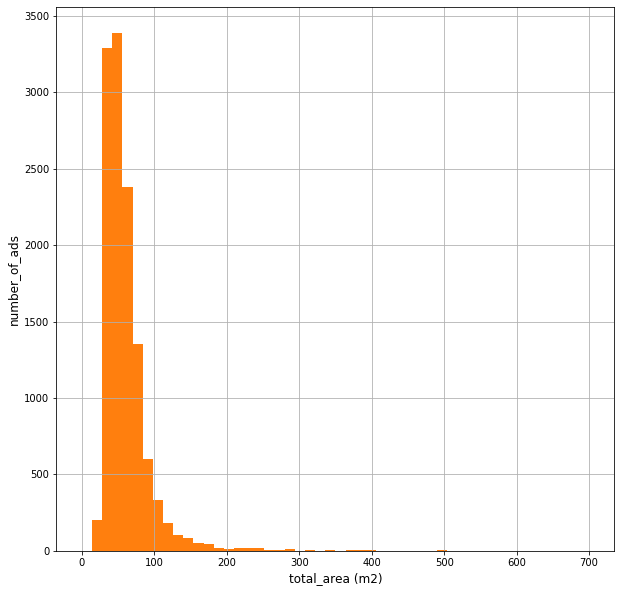

In [55]:
df['total_area'].hist(bins = 50, range = (0, 700), figsize= (10, 10)).set_xlabel('total_area (m2)', fontsize=12)
df['total_area'].hist(bins = 50, range = (0, 700), figsize= (10, 10)).set_ylabel('number_of_ads',fontsize=12)

Для визуализации данных наших столбцов, а именно, построения графика boxplot, напишем функцию

In [56]:
def visualization(df, column):
    return df.boxplot(column, figsize= (10, 10)).set_ylabel('number_of_ads',fontsize=10)

Text(0, 0.5, 'number_of_ads')

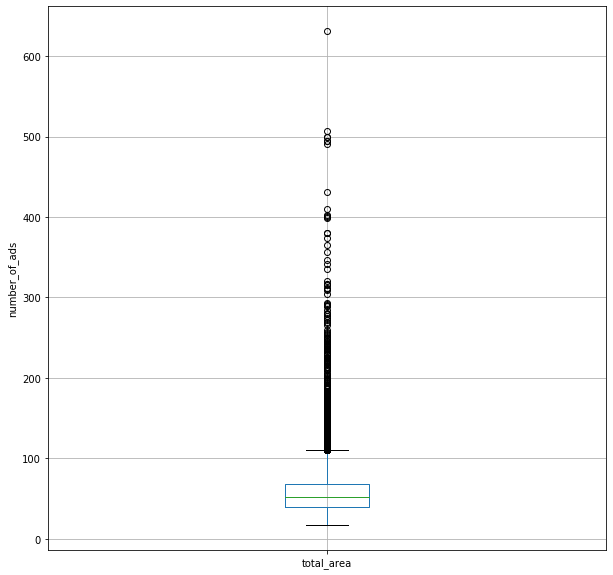

In [57]:
visualization(df,'total_area')

Распределение выглядело бы вполне нормально, если бы не значения после 500.  Максимальная площадь квартиры 700м2 выглядит странновато и неуместно, больше похоже на выброс, особенно, если учесть, что между 500 и 700 значений практически нет.

Для данных о цене тоже построим гистограмму

In [58]:
df['last_price'].describe()

count    1.213700e+04
mean     6.375928e+06
std      1.140718e+07
min      4.500000e+05
25%      3.450000e+06
50%      4.575000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Предположим, что цена написана в миллионах рублей

In [59]:
df['last_price'] = df['last_price'] / 1000000

In [60]:
df['last_price'].describe()

count    12137.000000
mean         6.375928
std         11.407177
min          0.450000
25%          3.450000
50%          4.575000
75%          6.500000
max        763.000000
Name: last_price, dtype: float64

Text(0, 0.5, 'number_of_ads')

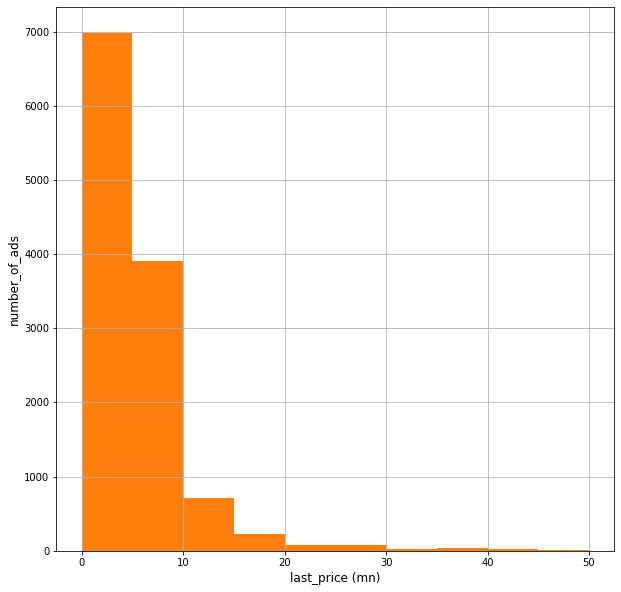

In [61]:
df['last_price'].hist(range = (0, 50), figsize= (10, 10)).set_xlabel('last_price (mn)', fontsize=12)
df['last_price'].hist(range = (0, 50), figsize= (10, 10)).set_ylabel('number_of_ads',fontsize=12)

Text(0, 0.5, 'number_of_ads')

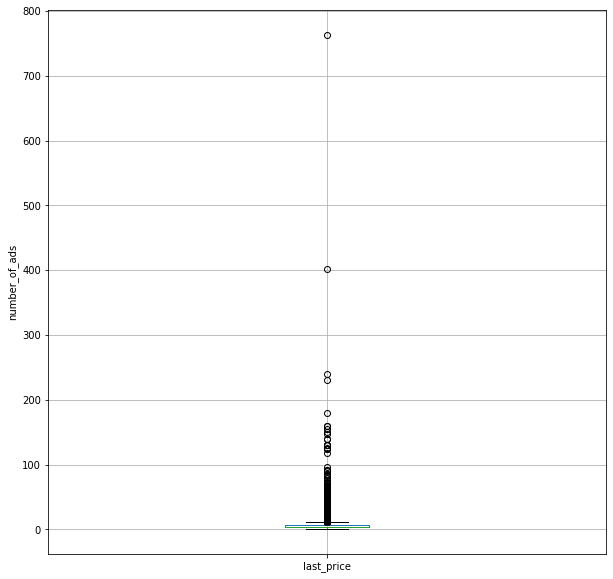

In [62]:
visualization(df,'last_price')

Стоимость в 800млн тоже очень сомнительна, также как и в 400млн. В остальном, гистограмма похожа на распределение Пуассона

Столбец с высотой потолков мы рассматривали ранее. Построим для него гистограмму

In [63]:
df['ceiling_height'].describe()

count    12137.000000
mean         2.726685
std          1.249634
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'number_of_ads')

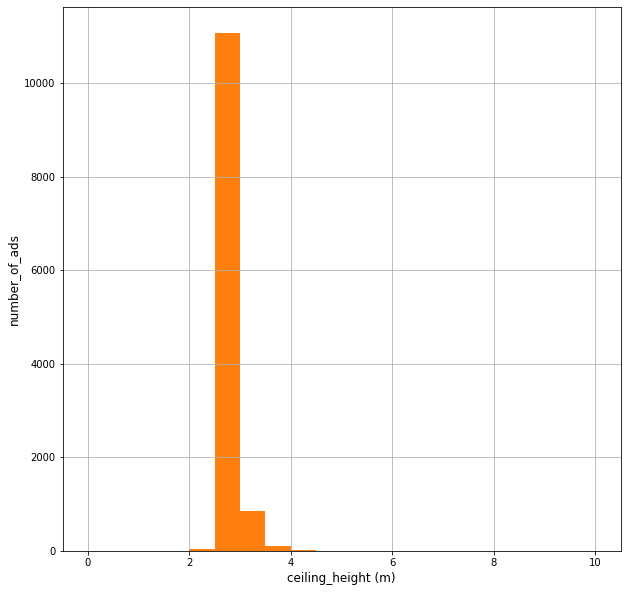

In [64]:
df['ceiling_height'].hist(bins = 20, range =(0,10), figsize= (10, 10)).set_xlabel('ceiling_height (m)', fontsize=12)
df['ceiling_height'].hist(bins = 20, range =(0,10), figsize= (10, 10)).set_ylabel('number_of_ads',fontsize=12)

Самое большое колличество жил площади с высотой потолка около 2,5м

Text(0, 0.5, 'number_of_ads')

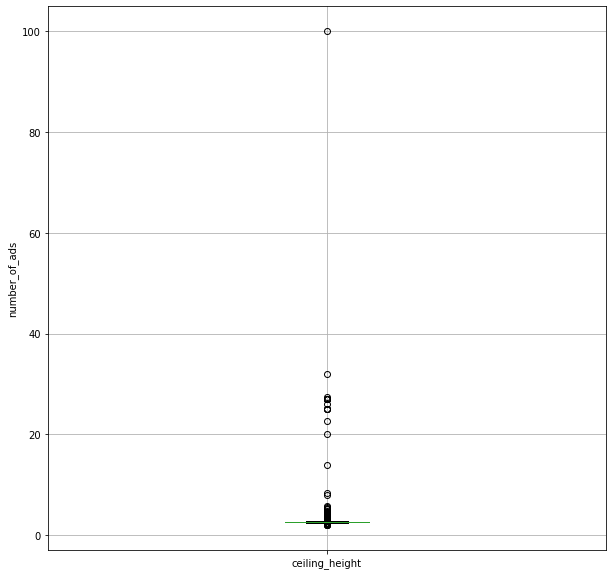

In [65]:
visualization(df,'ceiling_height')

Значения, равные 100, явно являются выбросами

### Выполнение поставенных заданий. Избавление от выбросов. Сверка<a name="step14"></a>

#### В данном разделе мы избавимся от выбросов в данных

In [66]:
df['days_exposition'].describe()

count    11066.000000
mean       177.369781
std        206.915524
min          2.000000
25%         44.000000
50%         97.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'number_of_ads')

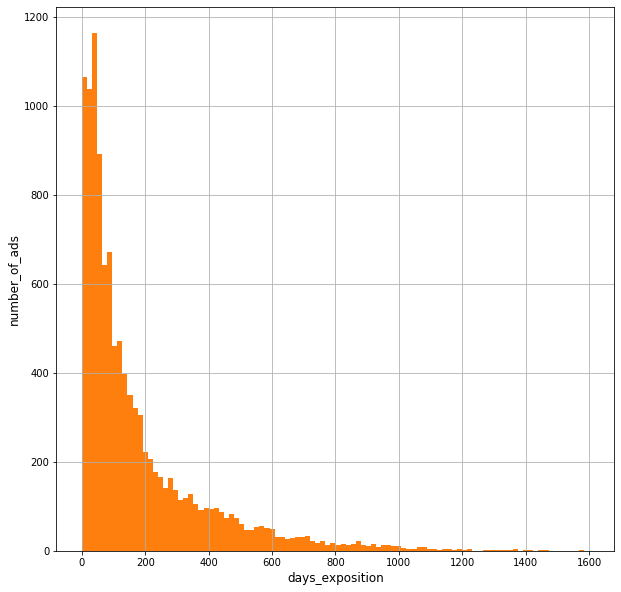

In [67]:
df['days_exposition'].hist(bins = 100, range =(0, 1600), figsize= (10, 10)).set_xlabel('days_exposition', fontsize=12)
df['days_exposition'].hist(bins = 100, range =(0, 1600), figsize= (10, 10)).set_ylabel('number_of_ads',fontsize=12)

Text(0, 0.5, 'number_of_ads')

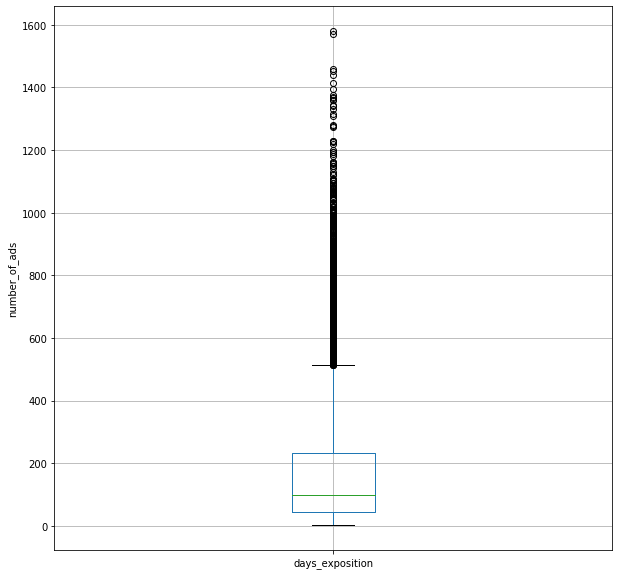

In [68]:
visualization(df,'days_exposition')

Квартиру, конечно, могли продать и по быстрому, за 2 дня, но сомневаюсь, что это правда, а 1580 дней выглядят совсем уж неправдоподобно, ведь это 4.5 года

(0, 250)

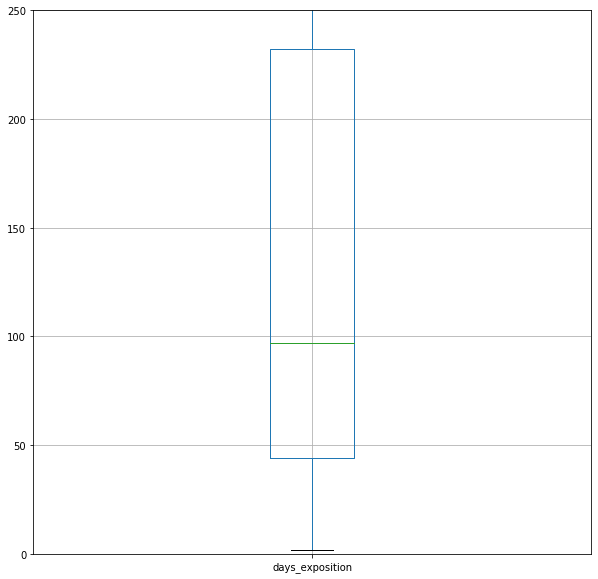

In [69]:
df.boxplot(['days_exposition'], figsize= (10, 10)).set_ylim(0, 250)

 Избавимся от выбросов и посмотрим, как изменятся графики

Напишем функцию, которая на вход будет принемать необходимые нам параметры столбца и проверять его значения на соотвествие условию. Значения должны находиться в интервале, ограниченом первым и третьим квартилями. Это поможет нам оставить только нормальные значения, а за их пределами будут находиться выбросы.

In [70]:
def removing_outliers(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    order = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[order].boxplot([column], figsize=(x,y))
    else:
        return df.loc[order]

Text(0, 0.5, 'number_of_ads')

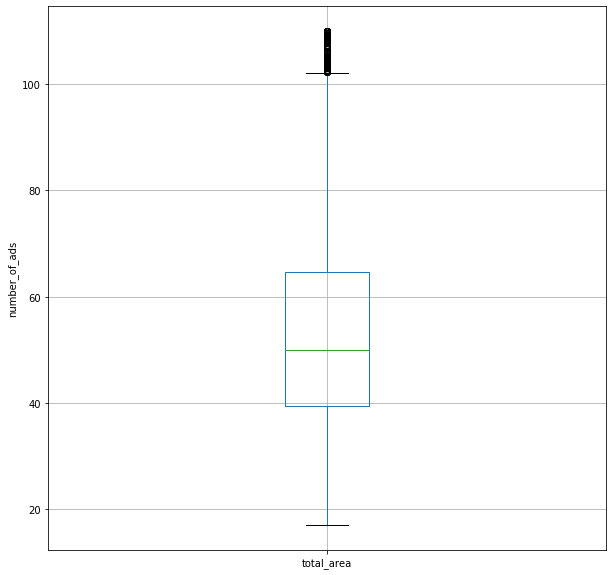

In [71]:
removing_outliers(df,'total_area',1,10,10).set_ylabel('number_of_ads',fontsize=10)

In [72]:
removing_outliers(df,'total_area',0)['total_area'].mean()

53.831590869640685

Text(0, 0.5, 'number_of_ads')

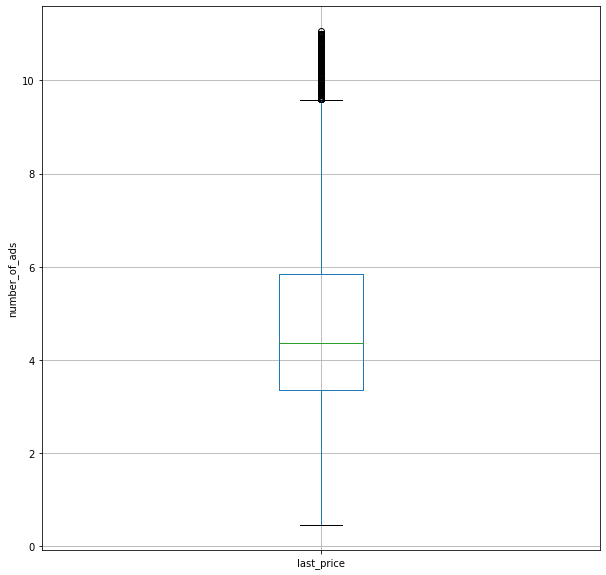

In [73]:
removing_outliers(df,'last_price',1,10,10).set_ylabel('number_of_ads',fontsize=10)

In [74]:
removing_outliers(df,'last_price',0)['last_price'].mean()

4.747540098856576

Text(0, 0.5, 'number_of_ads')

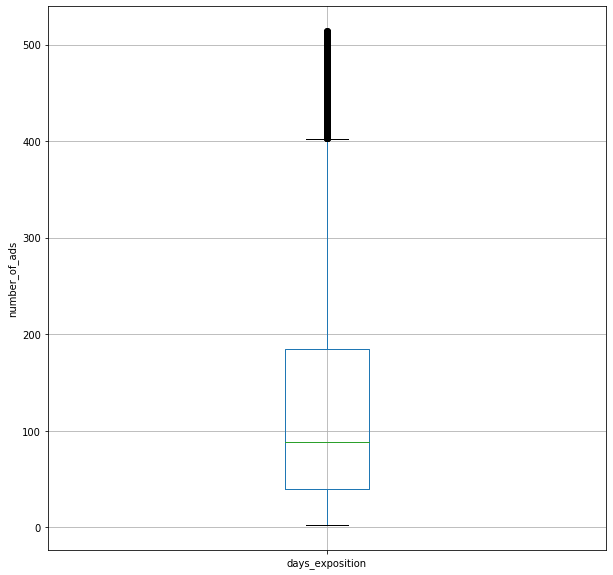

In [75]:
removing_outliers(df,'days_exposition',1,10,10).set_ylabel('number_of_ads',fontsize=10)

In [76]:
removing_outliers(df,'days_exposition',0)['days_exposition'].mean()

130.9255923242608

(20000, 175000)

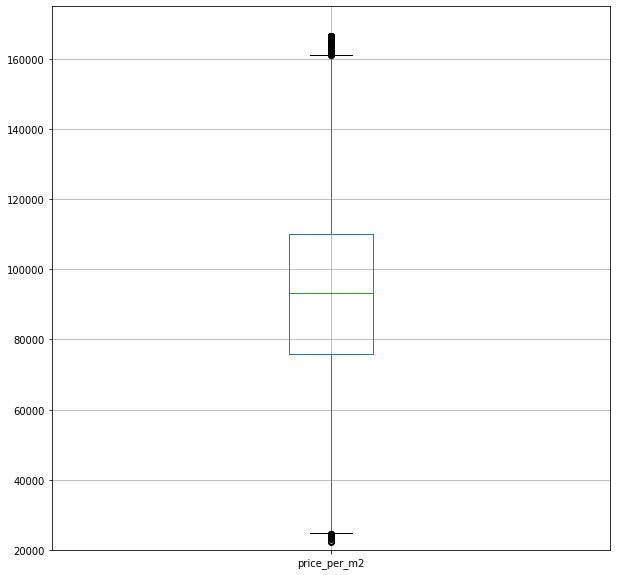

In [77]:
removing_outliers(df,'price_per_m2',1,10,10).set_ylim(20000, 175000)

In [78]:
removing_outliers(df,'price_per_m2',0)['price_per_m2'].mean()

93029.87459359341

Сравним показатели с выбросами и показатели без них

In [79]:
df_contrast = pd.DataFrame([['total_area', 59.386146, 53.831590869640685], 
                            ['price_per_m2', 98407.59611073343, 93029.87459359341], 
                            ['last_price', 6.375928, 4.747540098856576], 
                            ['days_exposition', 177.369781 ,130.9255923242608]], 
                           columns=['parameter','with', 'without'])

In [80]:
df_contrast

,parameter,with,without
0,total_area,59.386146,53.831591
1,price_per_m2,98407.596111,93029.874594
2,last_price,6.375928,4.747540
3,days_exposition,177.369781,130.925592


### Вывод:<a name="step15"></a>

После избавления от выбросов данные стали "чище"

## Ответы на поставленные в задании вопросы<a name="step16"></a>

### Какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра<a name="step17"></a>

In [81]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,NaN,0.0,NaN,0.460396,0.272277,Tuesday,December,2018,первый этаж,82920.792079
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,90.0,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,84.0,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,NaN,0.0,NaN,0.284182,0.386059,Thursday,November,2017,другой,99195.710456
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,NaN,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737


In [82]:
corr1 = df[['price_per_m2',\
           'total_area',\
           'last_price',\
           'days_exposition',\
           'citycenters_nearest',\
           'rooms']]

In [83]:
corr1.corr()

,price_per_m2,total_area,last_price,days_exposition,citycenters_nearest,rooms
price_per_m2,1.000000,0.329594,0.747819,0.042660,-0.325653,0.053718
total_area,0.329594,1.000000,0.627575,0.148606,-0.214177,0.752278
last_price,0.747819,0.627575,1.000000,0.078042,-0.190235,0.338245
days_exposition,0.042660,0.148606,0.078042,1.000000,-0.052628,0.123192
citycenters_nearest,-0.325653,-0.214177,-0.190235,-0.052628,1.000000,-0.146442
rooms,0.053718,0.752278,0.338245,0.123192,-0.146442,1.000000


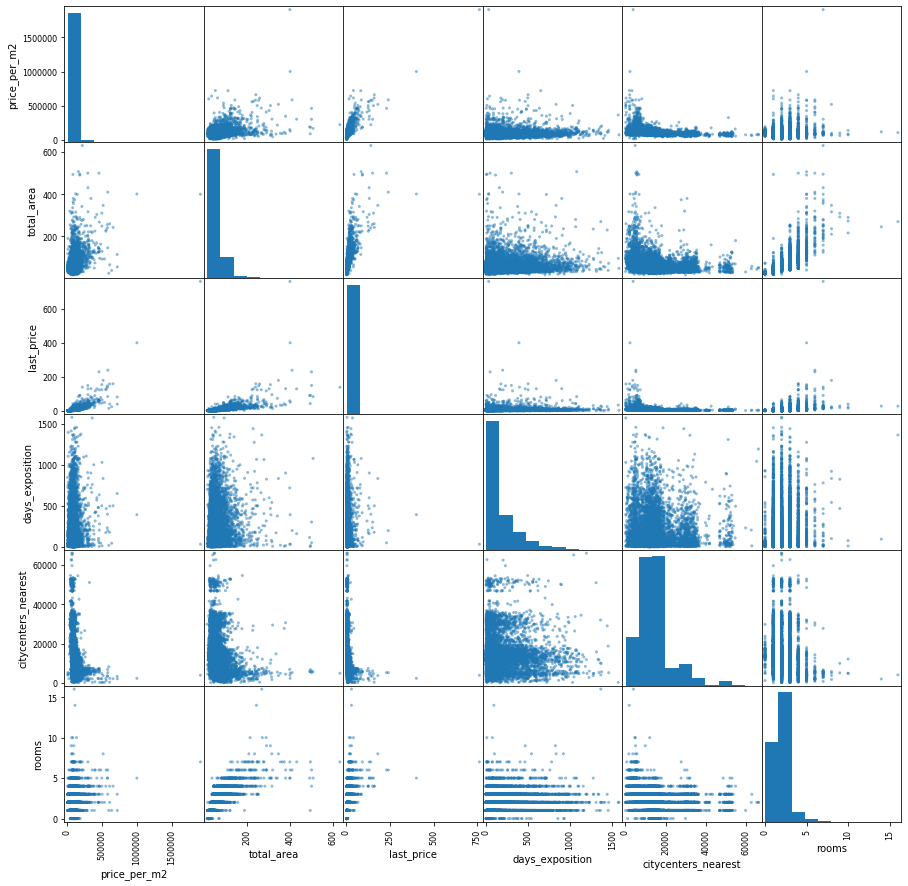

In [84]:
pd.plotting.scatter_matrix(corr1, figsize=(15,15));

### Вывод:

На цену влияет больше всего цена за квадратный метр, а также, расположение квартиры. Это очевидно, наверняка, квартиры в центре города стоят дороже, чем на окраине. Этот момент мы разберем позже по подробнее

### Зависимость от даты размещения: дня недели, месяца и года<a name="step18"></a>

In [85]:
df[['day_exposition', 'month_exposition', 'year_exposition']].head()

,day_exposition,month_exposition,year_exposition
1,Tuesday,December,2018
2,Thursday,August,2015
3,Friday,July,2015
6,Thursday,November,2017
7,Thursday,April,2019


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


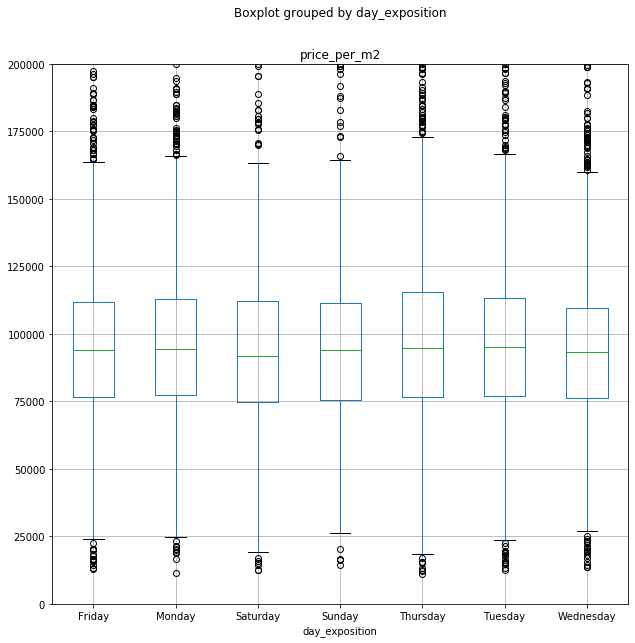

In [86]:
df.boxplot('price_per_m2', by='day_exposition',figsize=(10,10)).set_ylim(0,200000)
#строку ниже подсказал куратор, что бы не вылезало огромное красное предупреждение, непредусмотренное наше версией программы 
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

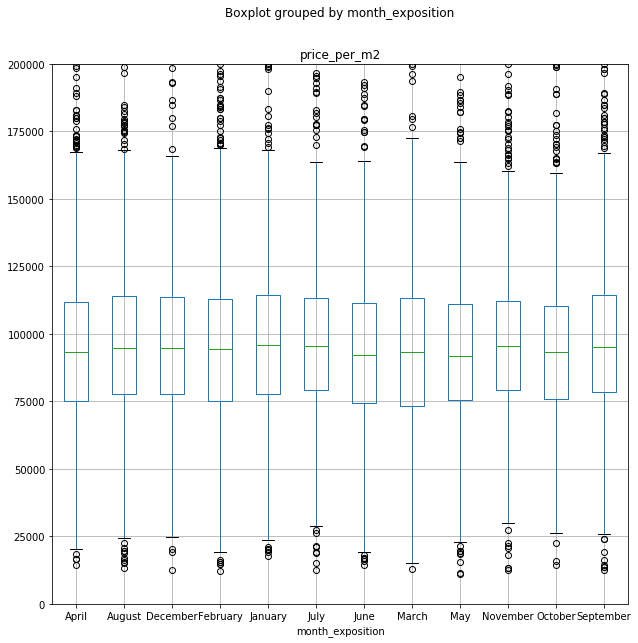

In [87]:
df.boxplot('price_per_m2', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

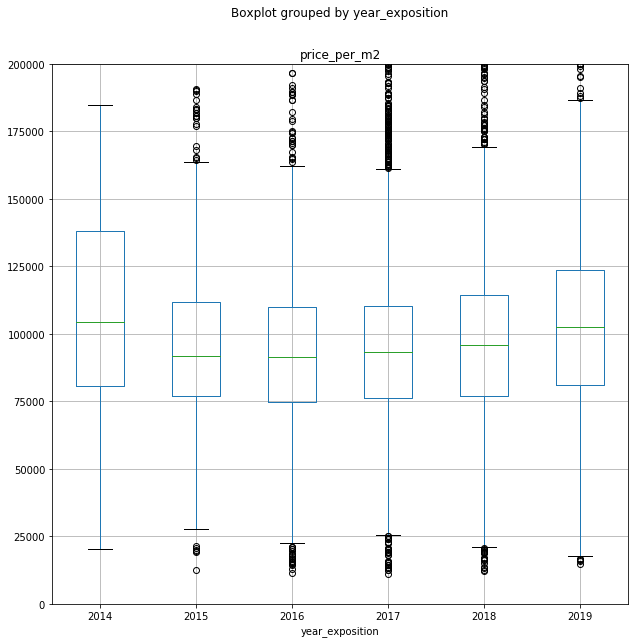

In [88]:
df.boxplot('price_per_m2', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

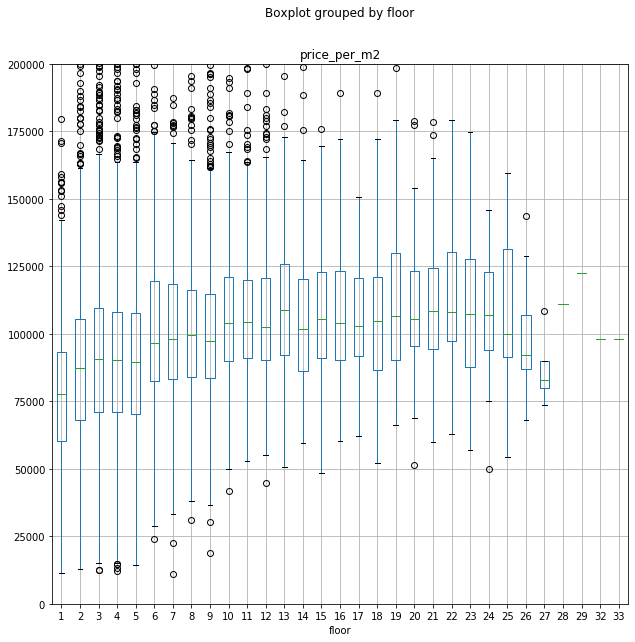

In [89]:
df.boxplot('price_per_m2', by='floor',figsize=(10,10)).set_ylim(0,200000)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

### Вывод:

Не могу сказать, что в какой то определенный день недели квартиры продаются лучше, с месяцем дела обстоят так же, а вот 2014 явно был успешнее в плане продаж квартир, нежели последующие года вплоть до 2019. В 2019 все, вроде стало налаживаться. 

### Исследование 10 населённых пунктов с наибольшим числом объявлений<a name="step19"></a>

Выберем 10 населённых пунктов с наибольшим числом объявлений. <br> Посчитаем среднюю цену квадратного метра в этих населённых пунктах. <br> Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [90]:
df['locality_name'].describe()

count               12137
unique                259
top       Санкт-Петербург
freq                 8009
Name: locality_name, dtype: object

In [91]:
((df['locality_name'].value_counts() / len(df))*100).head(10)

Санкт-Петербург      65.988300
поселок Мурино        2.587130
поселок Шушары        2.133971
Всеволожск            1.730246
деревня Кудрово       1.639614
Пушкин                1.639614
Гатчина               1.540743
поселок Парголово     1.532504
Колпино               1.425393
Выборг                0.865123
Name: locality_name, dtype: float64

In [92]:
pivot1 = df.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = 'mean').sort_values(by = ['price_per_m2'], ascending = False)
pivot1.head(10)

,price_per_m2
locality_name,
поселок Репино,127678.571429
Санкт-Петербург,112920.239163
Зеленогорск,111966.899172
Кудрово,104188.006866
Пушкин,102438.156729
Мурино,102406.318419
Сестрорецк,100338.166919
деревня Кудрово,93876.383157
поселок Стрельна,91691.623592


In [93]:
pivot2 = df.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = 'median').sort_values(by = ['price_per_m2'], ascending = False)
pivot2.head(10)

,price_per_m2
locality_name,
поселок Репино,127678.571429
Мурино,103772.766879
Санкт-Петербург,103383.458647
Кудрово,103203.719358
Пушкин,97590.361446
Сестрорецк,96250.000000
Зеленогорск,96215.159930
деревня Кудрово,93714.285714
поселок Парголово,90268.180728


In [94]:
pivot3 = pivot1.merge(pivot2, on='locality_name', suffixes=('_mean', '_median'))
pivot3.head(10)

,price_per_m2_mean,price_per_m2_median
locality_name,,
поселок Репино,127678.571429,127678.571429
Санкт-Петербург,112920.239163,103383.458647
Зеленогорск,111966.899172,96215.159930
Кудрово,104188.006866,103203.719358
Пушкин,102438.156729,97590.361446
Мурино,102406.318419,103772.766879
Сестрорецк,100338.166919,96250.000000
деревня Кудрово,93876.383157,93714.285714
поселок Стрельна,91691.623592,87741.935484


In [95]:
pivot3.tail(10)

,price_per_m2_mean,price_per_m2_median
locality_name,,
деревня Фалилеево,16374.106923,16374.106923
поселок городского типа Ефимовский,16268.841895,16268.841895
поселок Почап,16037.735849,16037.735849
поселок Житково,15648.286140,15648.286140
поселок станции Свирь,15000.000000,15000.000000
деревня Выскатка,13207.547170,13207.547170
поселок Тесово-4,12931.034483,12931.034483
деревня Малая Романовка,12724.550898,12724.550898
поселок Совхозный,12555.555556,12555.555556


 ### Вывод:

Очень странным мне показалось то, что цена за квадратный метр в посёлке больше чем в городе. Однако, википедия подсказала мне, что Репино находится в составе Курортного района города федерального значения Санкт-Петербурга, и картина прояснилась. <br> Местность с самой маленькое ценой за квадратный метр жилплощади не удивляет. Деревня Ям-Тесово очень мала и находится очень далеко от Санкт-Петербурга.<br> Неудивительно, и таблицы еще раз это подтверждают, что цена за квадратный метр жилья очень сильно зависит от местности, где это жилье расположено

### Исследование зависимости цены от удалённости от центра<a name="step20"></a>

Переведем и добавим в таблицу как новый столбец данные о расстоянии до центра в километрах.

In [96]:
df['citycenter_km'] = (df['citycenters_nearest']/1000).round()

In [97]:
df.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
1,поселок Шушары,1,40.4,18.6,11.0,2.65,2.0,1,11.0,False,...,0.0,NaN,0.460396,0.272277,Tuesday,December,2018,первый этаж,82920.792079,19.0
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286,14.0
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629,7.0
6,поселок Парголово,1,37.3,10.6,14.4,2.65,1.0,6,26.0,False,...,0.0,NaN,0.284182,0.386059,Thursday,November,2017,другой,99195.710456,19.0
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737,12.0


In [98]:
df['citycenter_km'].describe()

count    9332.000000
mean       14.718174
std         8.383675
min         0.000000
25%        10.000000
50%        13.000000
75%        17.000000
max        66.000000
Name: citycenter_km, dtype: float64

Рассмотрим по подробнее конкретно Санкт-Петербург

In [99]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
2,Санкт-Петербург,2,56.00,34.3,8.3,2.65,0.0,4,5.0,False,...,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286,14.0
3,Санкт-Петербург,3,159.00,89.5,27.6,2.65,0.0,9,14.0,False,...,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629,7.0
7,Санкт-Петербург,2,71.60,40.3,18.9,2.65,2.0,22,24.0,False,...,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737,12.0
9,Санкт-Петербург,3,61.00,43.6,6.5,2.50,2.0,7,9.0,False,...,0.0,NaN,0.714754,0.106557,Sunday,February,2017,другой,88524.590164,15.0
15,Санкт-Петербург,1,39.00,20.5,7.6,2.65,1.0,5,14.0,False,...,1.0,296.0,0.525641,0.194872,Saturday,November,2017,другой,119230.769231,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,Санкт-Петербург,1,31.00,18.0,6.5,2.55,0.0,6,9.0,False,...,1.0,317.0,0.580645,0.209677,Saturday,April,2017,другой,106451.612903,12.0
23687,Санкт-Петербург,1,39.00,20.0,11.0,2.65,2.0,6,9.0,False,...,0.0,NaN,0.512821,0.282051,Saturday,December,2017,другой,82051.282051,17.0
23689,Санкт-Петербург,1,35.30,16.3,9.1,2.86,2.0,4,15.0,False,...,2.0,652.0,0.461756,0.257790,Wednesday,February,2018,другой,100566.572238,16.0
23691,Санкт-Петербург,2,72.90,40.3,10.6,2.75,1.0,7,25.0,False,...,1.0,806.0,0.552812,0.145405,Thursday,October,2016,другой,129903.978052,4.0


Text(0, 0.5, 'number_of_ads')

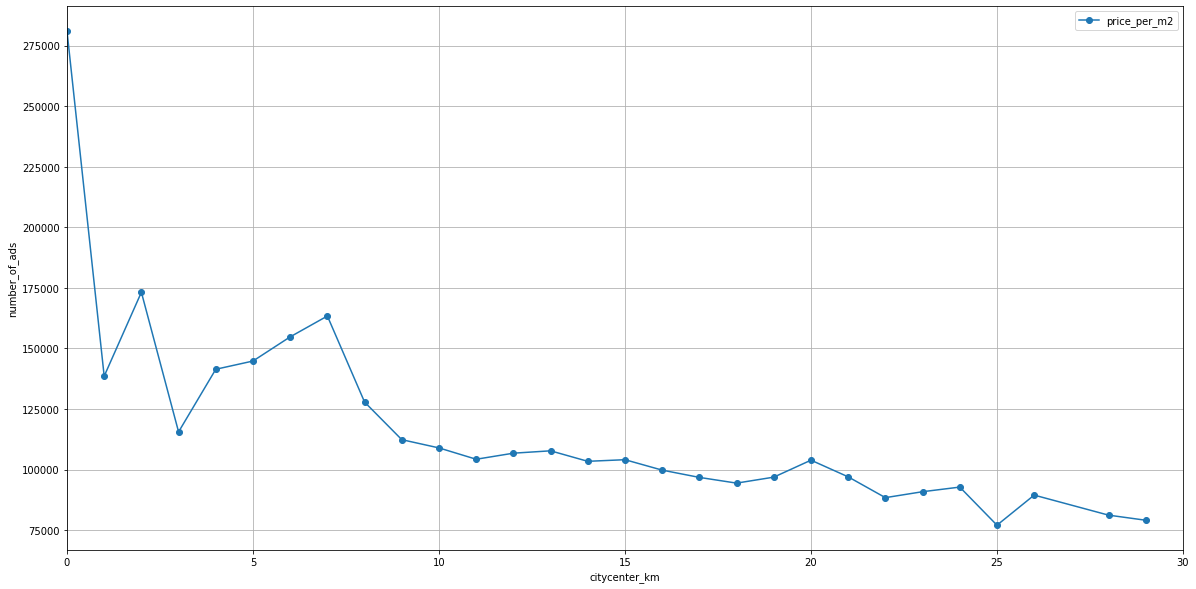

In [100]:
df_spb.pivot_table(index = 'citycenter_km', values = 'price_per_m2', aggfunc = 'mean').plot(style='o-', grid= True, xlim=(0,30), figsize=(20,10)).set_ylabel('number_of_ads',fontsize=10)

По графику видно, что чем дальше от центра квартира, тем дешевле она стоит за квадратный метр

График странно ведет себя вначале, приблизительно на 8 км от центра резкий скачок цены вверх, далее снова по убыванию

Рассмотрим срез до 8км от центра

In [101]:
center = df_spb.query('citycenter_km <= 8')
center

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629,7.0
24,Санкт-Петербург,2,97.2,46.5,19.6,2.65,0.0,1,3.0,False,...,3.0,124.0,0.478395,0.201646,Saturday,October,2015,первый этаж,66872.427984,2.0
52,Санкт-Петербург,6,136.0,94.0,11.0,3.00,1.0,2,2.0,False,...,0.0,NaN,0.691176,0.080882,Friday,September,2017,последний этаж,86727.941176,7.0
94,Санкт-Петербург,1,29.5,15.6,5.5,2.50,1.0,2,5.0,False,...,0.0,NaN,0.528814,0.186441,Friday,April,2019,другой,118644.067797,7.0
106,Санкт-Петербург,5,124.1,79.4,20.0,3.20,0.0,3,4.0,False,...,0.0,NaN,0.639807,0.161160,Thursday,May,2017,другой,84609.186140,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23590,Санкт-Петербург,3,123.3,50.4,23.6,2.65,0.0,18,NaN,False,...,0.0,NaN,0.408759,0.191403,Tuesday,April,2017,другой,171840.000000,5.0
23627,Санкт-Петербург,1,42.3,16.3,12.0,2.65,2.0,4,10.0,False,...,0.0,NaN,0.385343,0.283688,Friday,January,2017,другой,148936.170213,8.0
23632,Санкт-Петербург,1,38.0,21.4,6.6,2.55,1.0,15,16.0,False,...,1.0,230.0,NaN,NaN,Saturday,June,2018,другой,131578.947368,7.0
23665,Санкт-Петербург,1,47.0,18.2,14.6,2.65,0.0,1,6.0,False,...,1.0,519.0,0.387234,0.310638,Friday,May,2016,первый этаж,90425.531915,5.0


### Анализ сегмента и изучение следующих параметров: площадь, цена, число комнат, высота потолков<a name="step21"></a>

Также рассмотрим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [102]:
center.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
3,Санкт-Петербург,3,159.0,89.5,27.6,2.65,0.0,9,14.0,False,...,3.0,234.0,NaN,NaN,Friday,July,2015,другой,408176.100629,7.0
24,Санкт-Петербург,2,97.2,46.5,19.6,2.65,0.0,1,3.0,False,...,3.0,124.0,0.478395,0.201646,Saturday,October,2015,первый этаж,66872.427984,2.0
52,Санкт-Петербург,6,136.0,94.0,11.0,3.00,1.0,2,2.0,False,...,0.0,NaN,0.691176,0.080882,Friday,September,2017,последний этаж,86727.941176,7.0
94,Санкт-Петербург,1,29.5,15.6,5.5,2.50,1.0,2,5.0,False,...,0.0,NaN,0.528814,0.186441,Friday,April,2019,другой,118644.067797,7.0
106,Санкт-Петербург,5,124.1,79.4,20.0,3.20,0.0,3,4.0,False,...,0.0,NaN,0.639807,0.161160,Thursday,May,2017,другой,84609.186140,6.0


In [103]:
center_corr = center.corr()['last_price'].reset_index()
center_corr.sort_values('last_price', ascending=False)

,index,last_price
12,last_price,1.000000
23,price_per_m2,0.815569
1,total_area,0.619551
2,living_area,0.556755
3,kitchen_area,0.457486
0,rooms,0.342639
11,total_images,0.148472
16,parks_around3000,0.121399
18,ponds_around3000,0.095263
13,days_exposition,0.076096


In [104]:
not_center = df_spb.query('citycenter_km > 8')
not_center

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
2,Санкт-Петербург,2,56.00,34.3,8.3,2.65,0.0,4,5.0,False,...,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286,14.0
7,Санкт-Петербург,2,71.60,40.3,18.9,2.65,2.0,22,24.0,False,...,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737,12.0
9,Санкт-Петербург,3,61.00,43.6,6.5,2.50,2.0,7,9.0,False,...,0.0,NaN,0.714754,0.106557,Sunday,February,2017,другой,88524.590164,15.0
15,Санкт-Петербург,1,39.00,20.5,7.6,2.65,1.0,5,14.0,False,...,1.0,296.0,0.525641,0.194872,Saturday,November,2017,другой,119230.769231,14.0
17,Санкт-Петербург,1,36.00,16.5,11.0,2.65,1.0,7,17.0,False,...,1.0,859.0,0.458333,0.305556,Friday,September,2016,другой,116111.111111,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,Санкт-Петербург,1,36.40,14.9,9.3,2.65,0.0,13,16.0,False,...,0.0,NaN,0.409341,0.255495,Wednesday,June,2016,другой,97527.472527,12.0
23686,Санкт-Петербург,1,31.00,18.0,6.5,2.55,0.0,6,9.0,False,...,1.0,317.0,0.580645,0.209677,Saturday,April,2017,другой,106451.612903,12.0
23687,Санкт-Петербург,1,39.00,20.0,11.0,2.65,2.0,6,9.0,False,...,0.0,NaN,0.512821,0.282051,Saturday,December,2017,другой,82051.282051,17.0
23689,Санкт-Петербург,1,35.30,16.3,9.1,2.86,2.0,4,15.0,False,...,2.0,652.0,0.461756,0.257790,Wednesday,February,2018,другой,100566.572238,16.0


In [105]:
not_center.head(10)

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,is_apartment,...,ponds_around3000,ponds_nearest,living_area_ratio,kitchen_area_ratio,day_exposition,month_exposition,year_exposition,floors_number,price_per_m2,citycenter_km
2,Санкт-Петербург,2,56.0,34.3,8.3,2.65,0.0,4,5.0,False,...,2.0,574.0,0.612500,0.148214,Thursday,August,2015,другой,92785.714286,14.0
7,Санкт-Петербург,2,71.6,40.3,18.9,2.65,2.0,22,24.0,False,...,0.0,NaN,NaN,0.263966,Thursday,April,2019,другой,110544.692737,12.0
9,Санкт-Петербург,3,61.0,43.6,6.5,2.50,2.0,7,9.0,False,...,0.0,NaN,0.714754,0.106557,Sunday,February,2017,другой,88524.590164,15.0
15,Санкт-Петербург,1,39.0,20.5,7.6,2.65,1.0,5,14.0,False,...,1.0,296.0,0.525641,0.194872,Saturday,November,2017,другой,119230.769231,14.0
17,Санкт-Петербург,1,36.0,16.5,11.0,2.65,1.0,7,17.0,False,...,1.0,859.0,0.458333,0.305556,Friday,September,2016,другой,116111.111111,15.0
18,Санкт-Петербург,1,31.0,19.4,5.6,2.50,1.0,2,5.0,False,...,0.0,NaN,0.625806,0.180645,Friday,January,2017,другой,104838.709677,11.0
21,Санкт-Петербург,1,31.6,16.9,5.7,2.65,1.0,2,5.0,False,...,0.0,NaN,0.534810,0.180380,Wednesday,March,2018,другой,101265.822785,10.0
25,Санкт-Петербург,2,76.0,39.0,15.0,2.75,2.0,18,23.0,False,...,1.0,564.0,0.513158,0.197368,Thursday,October,2015,другой,89473.684211,15.0
27,Санкт-Петербург,3,70.0,49.0,9.2,2.60,0.0,11,17.0,False,...,1.0,779.0,0.700000,0.131429,Friday,May,2017,другой,101428.571429,11.0
29,Санкт-Петербург,3,100.0,52.0,11.0,2.65,0.0,15,19.0,False,...,1.0,896.0,0.520000,0.110000,Saturday,April,2016,другой,86000.000000,12.0


In [106]:
corr_not_center = not_center.corr()['last_price'].reset_index()
corr_not_center.sort_values('last_price', ascending=False)

,index,last_price
12,last_price,1.000000
1,total_area,0.840597
2,living_area,0.716964
3,kitchen_area,0.626077
0,rooms,0.533411
23,price_per_m2,0.512865
5,balcony,0.237670
11,total_images,0.210250
7,floors_total,0.200906
6,floor,0.147660


In [107]:
corr_table = center_corr.merge(corr_not_center, on='index',suffixes=('_in_center', '_out_center'))
corr_table

,index,last_price_in_center,last_price_out_center
0,rooms,0.342639,0.533411
1,total_area,0.619551,0.840597
2,living_area,0.556755,0.716964
3,kitchen_area,0.457486,0.626077
4,ceiling_height,0.023141,0.063517
5,balcony,0.057148,0.237670
6,floor,0.063429,0.147660
7,floors_total,-0.025626,0.200906
8,is_apartment,0.055372,0.009577
9,studio,-0.019464,-0.069762


Text(0.5, 0, 'index')

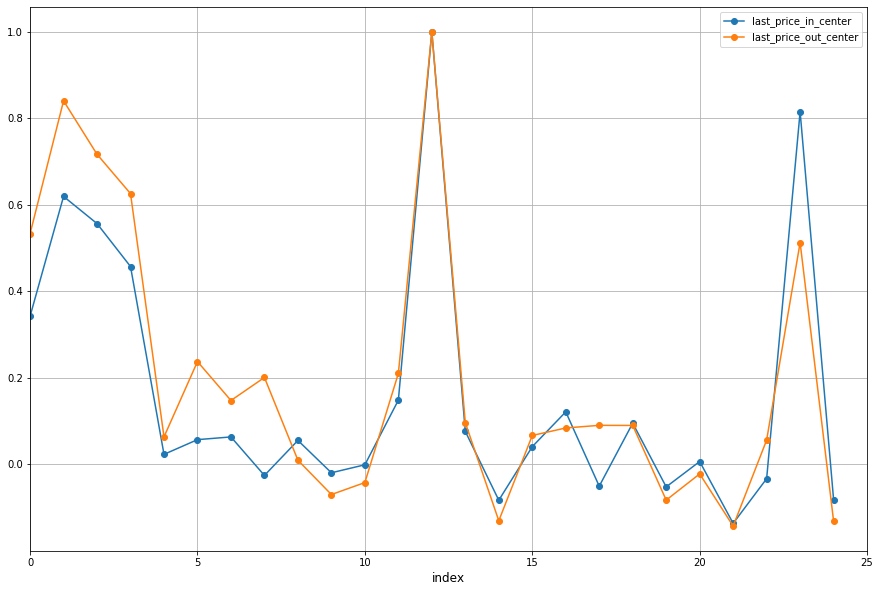

In [108]:
corr_table.plot(style = '-o', figsize = (15,10), xlim=(0,25), grid = True).set_xlabel('index', fontsize=12) 

### Вывод:

Показатели, по которым люди выбирают квартиру в центре и за центром, отличаются. <br> В центре больше важны парки, видимо люди, живущие там, ценят красивые виды. <br> Люди вне центра ценят более практичные вещи: количество комнат, наличие балкона и тд.<br> В общем и целом данные почти не отличаются, по крайней мере, ничего координального.<br>  В данном исследовании получается, что в центре живут такие же люди, как и вне его, только богаче.

## Общий вывод:<a name="step22"></a>

В общем и целом, проведя данное исследование, можно с точностью сказать, что квартиры в городе стоят дороже, это неудевительно и очевидно. <br> Чем дальше от центра, тем больше люди ценят практичность, типа наличия балкона или количество комнат. <br> Число и месяц размещения объявления на скорость продажи не особо влияют, а вот год, видимо, может быть как удачным, так и наоборот. <br> Показатели графиков с выбросами и без отличаются, но не координально.